![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=Mathematics/DataAndSinusoidalFunctions/data-and-sinusoidal-functions.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

In [1]:
import numpy as np
import pylab as plt
from IPython.display import display, Latex, clear_output, Markdown, Image, HTML, Javascript
import ipywidgets as widgets
from astropy.table import Table, Column
from ipywidgets import interact, interactive, Button , Layout
import ipywidgets as w
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import math
from ggb import *
ggb = GGB()

# Create a text box for user to input text
get_user_text = w.Textarea( value='', placeholder='Enter your text here.', description='', disabled=False , layout=Layout(width='100%', height='250px') )
# Create a slider to obtain shift integer from user 
get_user_shift = w.IntSlider( value=7, min=1, max=26, step=1, description='Ceasar Shift:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='d')

# Function: After clicking on a button prompt, the next cell is executed.
def rerun_cell(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
    button_t = w.Button(button_style='info',description="Restart") 

from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

<IPython.core.display.Javascript object>

# Represent data, using sinusoidal function, to solve problems

*By Jessica Cervi*

![Math_Gif](https://media.giphy.com/media/l0HlOvy6nzJ0uwJry/giphy.gif)
<center>*GIF taken from https://media.giphy.com/media/l0HlOvy6nzJ0uwJry/giphy.gif, June 26th, 2018.*</center>



## Overview

>### Lesson outcomes

<ul>
    <li> Graph data and determine the sinusoidal functions that best approximate the data. </li>
    <li> Interpret the graph of a sinusoidal function that models a situation, and explain the reasoning. </li>
</ul>


>## Introduction

In Mathematics, given a set of data points, it is possible to construct a curve, or mathematical function, that has the best fit to those points. This process is called curve fitting.

In the case that the data are somewhat cyclic, it is possible to sketch a curve of best fit that somehow resembles a sinusoidal function.  The fitting sinusoidal curve is found by determining the specific parameters which makes the curve match your data as closely as possible.

To better understand what we mean by cyclic data observe the applet below. It shows a pendulum swinging. By toggling the **graph** option, you can see that its movement at the point $A$ can be modelled by the particle $A'$ travelling on a sinusoidal function which can be written as

$$f(t) = \theta_0 \cos\left(\sqrt{\frac{g}{l}}t\right)$$.

In [2]:
ggb.file('files/pendulum.ggb').draw();

<IPython.core.display.Javascript object>

#### Example

Suppose we now want to collect data about the height of the pendulum at different times as showed in the table below.


Time |Height
--- | ---
 1| 9.7
2 | 13.4
3 | 17
4 | 14.1
5 | 9.3
6 | 13.6
7 | 16.8
8 | 13.8
9 | 9.2
10 | 13.4

The following plot shows the data collected.

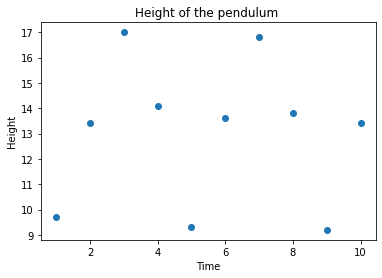

In [3]:
time = np.linspace(1,10,10)
height= np.array([9.7, 13.4, 17, 14.1, 9.3, 13.6, 16.8, 13.8, 9.2, 13.4])
plt.plot(time, height, 'o')
plt.title("Height of the pendulum ")
plt.xlabel("Time")
plt.ylabel("Height")
axes = plt.gca()
plt.show()

The graph below shows the sinusoidal function that best fits the data we have collected.

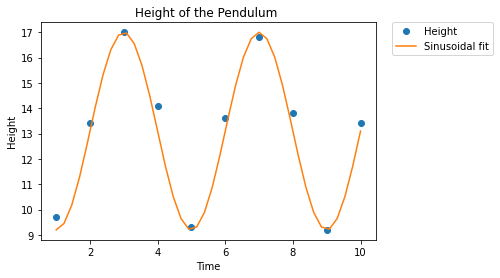

In [4]:
time = np.linspace(1,10,10)
height= np.array([9.7, 13.4, 17, 14.1, 9.3, 13.6, 16.8, 13.8, 9.2, 13.4])
x = np.linspace(1,10,40)
y = 3.9*np.sin((2*np.pi)*(x+2)/4) + 13.1
plt.plot(time, height, 'o', label = 'Height')
plt.plot(x, y, label = 'Sinusoidal fit')
plt.title("Height of the Pendulum ")
plt.xlabel("Time")
plt.ylabel("Height")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes = plt.gca()
plt.show()

In the next sections we will learn how to define and construct a sinusoidal function from a given set of data.

## The sinusoidal function

The key idea behind sinusoidal functions is that they can all be expressed as a sine function.

The general form of a sinusoidal function can be written as
$$ y = a \sin (bx-c)+d$$

We can also use the cosine function, but since $\sin(x) = \cos(\pi/2 - x)$ for every $x$, we can express every sinusoidal function using the sine function.

***

**Features of a sinusoidal function**

Each sinusoidal function can be uniquely determined by four characteristic parameters:

<ul>
    <li>$a$ is the *amplitude*. The amplitude describes the vertical footprint of a graph is and can be computed in the following way
        $$a = \frac{\text{maximum value} - \text{minimum value}}{2}$$ .  
        As you see, $a$ is always a non-negative quantity -- a large $a$ indicates a graph with wide vertical fluctuations, while a smaller $a$ tells us that the graph is confined to a more narrow horizontal region.
        
   <li> $b$ is the *frequency*. The frequency describes the number of cycles that happen in $360^{\circ}$ or $2\pi$ radians. It can be used to compute the period  $T$ as 
    $$T= \frac{360^{\circ}}{b} \quad\text{  or  } \quad T= \frac{2\pi}{b}$$ .
    The larger the frequency, the more condensed the waves will be.
        <li> $c$ is the *phase shift* and it indicates the horizontal translation that has been applied to the graph of 
    $$y=\sin(x)$$
    If $c>0$ the graph is shifted to the right, otherwise it is shifted to the left.
    <li> $d$ is the *midline* and it indicates by how much the function has been translated vertically. It can be computed as
    $$d = \frac{\text{maximum value} + \text{minimum value}}{2}$$
    If $d>0$, the graph is shifted up, otherwise it is shifted down.
<ul>
    


<img src="./figures/sine_sinusoidal.jpg" style="width: 500px;"/>

## Matching the equation of a sinusoidal function to the corresponding graph

In this section, we will learn how to describe the characteristics of a sinusoidal function by analyzing its graph.

The simplest and most basic sinusoidal function we could come across  is $$y=\sin(x),$$ whose graph is
<img src="./figures/sine.jpg" style="width: 700px;"/>

We already leaned that the value of $a$ changes how tall or short the graph is. The figure below shows you different sinusoidal functions that have different amplitudes.

<img src="./figures/amplitudes.jpg" style="width: 700px;"/>

By changing the value of $b$, we can see whether a graph is more stretched or condensed. The figure below shows you different functions with different periods.

<img src="./figures/periods.jpg" style="width: 700px;"/>

The figure below describes how the value of $c$ translates the graph horizontally.  

<img src="./figures/c_values.jpg" style="width: 700px;"/>

Finally, the figure below shows how $d$ moves the graph of $\sin(x)$ vertically.

<img src="./figures/d_value.jpg" style="width: 700px;"/>

Use the following widget to change the shape of the sinusoidal function

In [5]:
ggb.file('files/sin.ggb').draw();

<IPython.core.display.Javascript object>

### Example

Write the equation of the sinusoidal function corresponding to the following graph.

<img src="./figures/example_sin.jpg" style="width: 700px;"/>

We start by computing the amplitude: we know that its value is given by

$$a = \frac{\text{maximum value} - \text{minimum value}}{2}$$ 

By looking at the graph we observe that the $\text{maximum value} = 1$ and $\text{minimum value} = -5$ so 

$$a = \frac{1 -(-5)}{2} = \frac{6}{2} = 3$$

Next we know that the value of $d$ is given by 

$$d = \frac{\text{maximum value} + \text{minimum value}}{2}.$$

So $$d = \frac{1 + (-5)}{2} = \frac{-4}{2} = -2.$$

Next we can compute the value of $b$. The period of the graph is 6, which can be measured from the peak at  $x = 1$  to the next peak at  $x = 7$, or from the distance between two troughs. We know that $T= \frac{2\pi}{b}$. By inverting the previous formula we get

$$ b = \frac{2\pi}{T}=\frac{2\pi}{6}=\frac{\pi}{3}$$

So far for our sinusoidal function equation, we have 

$$y = 3\sin\left(\frac{\pi}{3}x -c\right) -2$$

The simplest way to compute $c$ is by substituting the coordinates of a point on the curve into the function. For example, we can pick the point with coordinates $(1,1)$. Substituting these coordinates into our function we get

$$1 = 3\sin\left(\frac{\pi}{3} -c\right) -2$$

$$3 = 3\sin\left(\frac{\pi}{3} -c\right)$$

$$1 = \sin\left(\frac{\pi}{3} -c\right)$$
When does $\sin = 1$? Well, it does at many inputs, but the "first" one is $\sin(\frac{\pi}{2})$.

$$\sin\left(\frac{\pi}{2}\right)=1$$

$$\left(\frac{\pi}{3} -c\right)=\frac{\pi}{2}$$
Solve for $c$ by getting all other terms on the other side. 
 $$c =- \frac{\pi}{2} +\frac{\pi}{3}= \frac{\pi}{6}$$


So our sinusoidal function has equation

$$y = 3\sin\left(\frac{\pi}{3}x + \frac{\pi}{6}\right) -2$$

### Exercise

Find the equation of the sinusoidal function for the graph below.

<img src="./figures/sin_exercise.jpg" style="width: 700px;"/>

In [6]:
display(Latex("What is the amplitude of the function in the graph ?"))

attempts_1 = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [7]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '2'

if (attempts_1 == 0):
    attempts_1 += 1
else:
    # Close the option to keep attempting the answer 
    if(attempts_1 >= 4):
        exercise_1.disabled = True
        button_exercise_1.disabled = True
        display(Markdown("#### The amplitude is \n $2$"))
    # If answer is correct, display appropriate markdown cells
    if(user_answer == expected_answer):        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The amplitude is \n $2$"))
        exercise_1.disabled = True
        button_exercise_1.disabled = True
    else:
        attempts_1 += 1

        if(attempts_1 <= 4):
            display(Markdown("# Please try again."))

In [8]:
display(Latex("What is the vertical translation of the sinusoidal function?"))
attempts_2 = 0
exercise_2 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_2)
button_exercise_2 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_2.on_click(rerun_cell)
display(button_exercise_2)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [9]:
# Exercise 2 user answer handling
user_answer = exercise_2.value
expected_answer = '2'
# Close the option to keep attempting the answer 
if attempts_2 == 0:
    attempts_2 += 1
else:
    if(attempts_2 >= 4):    
        exercise_2.disabled = True
        button_exercise_2.disabled = True
        display(Markdown("#### The vertical translation is \n $2$"))
    # If answer is correct, display appropriate markdown cells
    if(user_answer == expected_answer):
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The vertical translation is \n $2$"))
        exercise_2.disabled = True
        button_exercise_2.disabled = True    
    else:
        attempts_2 += 1
        if(attempts_2 <= 4):
            display(Markdown("# Please try again."))  

In [10]:
display(Latex("What is the frequency of the sinusoidal function?"))
attempts_3 = 0
exercise_3 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_3)
button_exercise_3 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_3.on_click(rerun_cell)
display(button_exercise_3)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [11]:
# Exercise 3 user answer handling
user_answer = exercise_3.value
expected_answer = 'pi/2'
# Close the option to keep attempting the answer 
if attempts_3 == 0:
    attempts_3 += 1
else:
    if(attempts_3 >= 4):
        exercise_3.disabled = True
        button_exercise_3.disabled = True
        display(Markdown("#### The frequency is \n $\pi/2$"))
    # If answer is correct, display appropriate markdown cells
    if(user_answer == expected_answer):
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The frequency is \n $pi/2$"))
        exercise_3.disabled = True
        button_exercise_3.disabled = True
    else:
        attempts_3 += 1
        if(attempts_3 <= 4):
            display(Markdown("# Please try again."))

In [12]:
display(Latex("What is the horizontal translation of the sinusoidal function?"))
attempts_4 = 0
exercise_4 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_4)
button_exercise_4 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_4.on_click(rerun_cell)
display(button_exercise_4)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [13]:
# Exercise 4 user answer handling
user_answer = exercise_4.value
expected_answer = 'pi/4'
if attempts_4 == 0:
    attempts_4 += 1
else:
    # Close the option to keep attempting the answer 
    if(attempts_4 >= 4):
        exercise_4.disabled = True
        button_exercise_4.disabled = True
        display(Markdown("#### The horizontal translation is \n $pi/4$"))
    # If answer is correct, display appropriate markdown cells    
    if(user_answer == expected_answer):
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The horizontal translation is \n $\pi/4$"))
        exercise_4.disabled = True
        button_exercise_4.disabled = True
    else:
        attempts_4 += 1
        if(attempts_4 <= 4):
            display(Markdown("# Please try again."))

In this lesson we will only be looking at **sinusoidal functions**.

Use the activity below to understand whether you are dealing with the equation of a sinusoidal function or not.

In [14]:
def lin_or_non(val):
    if val == "Yes":
        display(Latex("Correct!"))
        #display(Latex("This equation has no exponent on either variable, and is therefore linear."))
    elif val == "No":
        display(Latex("Try Again!"))
display(Latex("Is this the equation of a sinusoidal function?"))
display(Latex('$$y = 12\cos(\pi x +3.45) -3$$'))
interact(lin_or_non, val = widgets.Dropdown(options=[' ', 'Yes', 'No'],value = ' ',description = 'Choose One:',disabled = False));

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

interactive(children=(Dropdown(description='Choose One:', options=(' ', 'Yes', 'No'), value=' '), Output()), _…

***

**Determine the characteristics parameters of a sinusoidal function**

In the next example, we will learn how to compute the characteristic parameters when we're given the equation of a sinusoidal function.

Determine the characteristic parameters from the following equation:
$$y = 5\sin(3x) +2$$

<ul>
    <li>$a$ = 5 so the amplitude is 5
     <li>$b$ = 3 so the period $T$ is $\frac{2\pi}{3}$
     <li>$c$  = 0 so there is no horizontal translation
     <li>$d$ = 2 so the equation of the midline is at $y = 2$
<ul>


> ## Exercise: Finding the characteristic parameters of a sinusoidal function

Determine the characteristic parameters from the following equation:

$$y = 14.1\sin(4.2x+3.4)+2$$


In [15]:
display(Latex("What is the amplitude of the given sinusoidal function?"))
#value = display(widgets.Text(value='',placeholder='Type something',description='Amplitude =:',disabled=False))
attempts_5 = 0
exercise_5 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_5)
button_exercise_5 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_5.on_click(rerun_cell)
display(button_exercise_5)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [16]:
# Exercise 5 user answer handling
user_answer = exercise_5.value
expected_answer = '14.1'
if (attempts_5 == 0):
    attempts_5 += 1
else:
# Close the option to keep attempting the answer 
    if(attempts_5 >= 4):
        exercise_5.disabled = True
        button_exercise_5.disabled = True
        display(Markdown("#### The amplitude is \n $14.1$"))
    # If answer is correct, display appropriate markdown cells
    if(user_answer == expected_answer):
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The amplitude is \n $14.1$"))
        exercise_5.disabled = True
        button_exercise_5.disabled = True
    else:
        attempts_5 += 1
        
        if(attempts_5 <= 4):
            display(Markdown("# Please try again."))

In [17]:
display(Latex("What is the value of the frequency in the given sinusoidal function?"))
attempts_6 = 0
exercise_6 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_6)
button_exercise_6 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_6.on_click(rerun_cell)
display(button_exercise_6)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [18]:
# Exercise 6 user answer handling
user_answer = exercise_6.value
expected_answer = '4.2'
if (attempts_6 == 0):
    attempts_6 += 1
else:
    # Close the option to keep attempting the answer 
    if(attempts_6 >= 4):
        exercise_6.disabled = True
        button_exercise_6.disabled = True
        display(Markdown("#### The frequency is \n $4.2$"))
    # If answer is correct, display appropriate markdown cells
    if(user_answer == expected_answer):
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The frequency is \n $4.2$"))
        exercise_6.disabled = True
        button_exercise_6.disabled = True
    else:
        attempts_6 += 1
        
        if(attempts_6 <= 4):
            display(Markdown("# Please try again."))

In [19]:
display(Latex("By how much is the given sinusoidal function translated horizontally?"))
attempts_7 = 0
exercise_7 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_7)
button_exercise_7 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_7.on_click(rerun_cell)
display(button_exercise_7)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [20]:
# Exercise 7 user answer handling
user_answer = exercise_7.value
expected_answer = '3.4'
if (attempts_7 == 0):
    attempts_7 += 1
else:
    # Close the option to keep attempting the answer 
    if(attempts_7 >= 4):
        exercise_7.disabled = True
        button_exercise_7.disabled = True
        display(Markdown("#### The given sinusoidal function is translated horizontally by \n $3.4$"))
    # If answer is correct, display appropriate markdown cells
    if(user_answer == expected_answer):
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The given sinusoidal function is translated horizontally by \n $3.4$"))
        exercise_7.disabled = True
        button_exercise_7.disabled = True
    else:     
        attempts_7 += 1
        if(attempts_7 <= 4):
            display(Markdown("# Please try again."))

In [21]:
display(Latex("What is the equation of the midline in the given sinusoidal function?"))
attempts_8 = 0
exercise_8 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_8)
button_exercise_8 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_8.on_click(rerun_cell)
display(button_exercise_8)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle(…

In [22]:
# Exercise 8 user answer handling
user_answer = exercise_8.value
expected_answer = '2'
if (attempts_8 == 0):
    attempts_8 += 1
else:
# Close the option to keep attempting the answer 
    if(attempts_8 >= 4):
        exercise_8.disabled = True
        button_exercise_8.disabled = True
        display(Markdown("#### The midline of given sinusoidal function is at y= \n $2$"))
    # If answer is correct, display appropriate markdown cells 
    if(user_answer == expected_answer):
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The midline of given sinusoidal function is at y= \n $2$"))
        exercise_8.disabled = True
        button_exercise_8.disabled = True
    else:
        attempts_8 += 1
        if(attempts_8 <= 4):
            display(Markdown("# Please try again."))

## Example: Finding a Sinusoidal Functions from Temperature Data

Let's assume that we have some data representing the average temperate for each month:

Month | Average Temperature
--- | ---
 1| 9.7
2 | 13.4
3 | 17
4 | 22.2
5 | 27.2
6 | 32.9
7 | 36.5
8 | 38.4
9 | 32.9
10 | 24.4
11 | 19
12 | 11

The data is presented in the graph below.

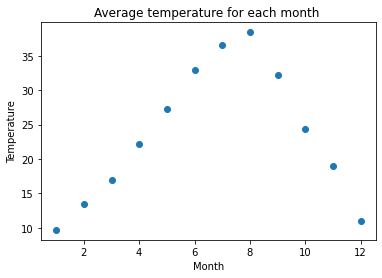

In [23]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
plt.plot(month, temperature, 'o')
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
axes = plt.gca()
plt.show()

We want to fit this data to a sinusoidal function $ y = a \sin (bx-c)+d$.

First of all, we need to determine the *amplitude* $a$:

$$a = \frac{\text{maximum value} - \text{minimum value}}{2} = \frac{38.4-9.7}{2} =14.35$$

Next, we determine the value of the midline $d$:

$$d = \frac{\text{maximum value} + \text{minimum value}}{2} = \frac{38.4+9.7}{2} =24.05$$

For this exercise, the frequency $b$ be computed in the following way. The  average temperature cycle will  repeat itself every year, so the period $T = 12$ months. Therefore $b$ can be computed by inverting the formula for the period $T$:

$$b = \frac{2\pi}{T} = \frac{2\pi}{12} =0.52$$

Using $a=14.35$, $b = 0.52$, and $d = 24.05$, determine horizontal shift by choosing an arbitrary data point $(x,y)$ from the given table and solving the equation 

$$y = 14.35 \sin (0.52x-c)+24.05$$
for $c$.

Let’s choose the first data point, $x = 1$ (January), $y = 9.7$

$$9.7 = 14.35 \sin (0.52(1)-c)+24.05$$

$$-14.35.7 = 14.35 \sin (0.52-c)$$

$$-1 =  \sin (0.52-c)$$


When does $\sin = -1$? Again, it does at many places, but the main one is at $- \frac{\pi}{2}$.

$$\sin\left(-\frac{\pi}{2}\right)=-1$$

So we have

$${0.52 -c}=-\frac{\pi}{2}$$
Solve for $c$ by getting all other terms on the other side. 
 $$c = \frac{\pi}{2} + 0.52 = 2.09$$

So the sinusoidal function that fits the data is

$$y = 14.35 \sin (0.52x-2.09)+24.05$$

and its graph is shown below.

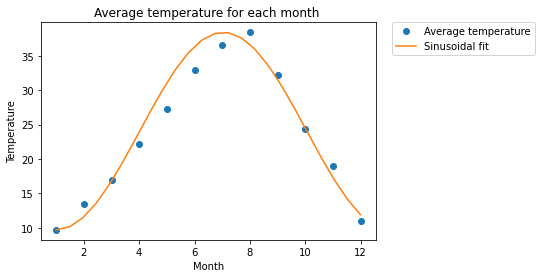

In [24]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
x = np.linspace(1,12, 24)
y = 14.35*np.sin(0.52*x -2.09) + 24.05
plt.plot(month, temperature, 'o', label = 'Average temperature')
plt.plot(x, y, label = 'Sinusoidal fit')
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes = plt.gca()
plt.show()

### Exercise

Tom boards the Ferris wheel at the Pacific Exhibition. When the ride begins, his height above the ground can be 
modelled by

$$x = 43\sin(3.5t-0.9)+47$$

How long does it take to the Ferris wheel to complete one revolution (period)?

What is the amplitude of the given function?

What is Tom's height above the ground when $t=10$?

What is the maximum height of Tom during the ride?

### Conclusions

<ul>
    <li> Cyclic data can be fit by a sinusoidal curve
     <li> A sinusoidal curve is uniquely defined by characteristic parameters
     <li> The parameters are the amplitude, the frequency and  the horizontal and vertical translations 

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)